In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import missingno as msg
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('deliveries.csv')
df1 = pd.read_csv('matches.csv')

In [3]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [5]:
df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
df1.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [7]:
print(df1.team1.unique())
print(df1.team2.unique())

['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']
['Royal Challengers Bangalore' 'Rising Pune Supergiant'
 'Kolkata Knight Riders' 'Kings XI Punjab' 'Delhi Daredevils'
 'Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions' 'Rajasthan Royals'
 'Chennai Super Kings' 'Deccan Chargers' 'Pune Warriors'
 'Kochi Tuskers Kerala' 'Rising Pune Supergiants' 'Delhi Capitals']


In [9]:
# consider mi and kkr team

In [10]:
main_df = df1[((df1['team1'] == 'Mumbai Indians') & (df1['team2'] == 'Kolkata Knight Riders')) | ((df1['team1'] == 'Kolkata Knight Riders') & (df1['team2'] == 'Mumbai Indians'))]
main_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
52,53,2017,Kolkata,2017-05-13,Mumbai Indians,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Mumbai Indians,9,0,AT Rayudu,Eden Gardens,A Nand Kishore,S Ravi,NaN
57,58,2017,Bangalore,2017-05-19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,6,KV Sharma,M Chinnaswamy Stadium,NJ Llong,Nitin Menon,NaN
74,75,2008,Kolkata,2008-04-29,Kolkata Knight Riders,Mumbai Indians,Kolkata Knight Riders,bat,normal,0,Mumbai Indians,0,7,ST Jayasuriya,Eden Gardens,BF Bowden,AV Jayaprakash,NaN
98,99,2008,Mumbai,2008-05-16,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,SM Pollock,Wankhede Stadium,BR Doctrove,DJ Harper,NaN
131,132,2009,Port Elizabeth,2009-04-27,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,bat,normal,0,Mumbai Indians,92,0,SR Tendulkar,St George's Park,BG Jerling,RB Tiffin,NaN
137,138,2009,East London,2009-05-01,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,bat,normal,0,Mumbai Indians,9,0,JP Duminy,Buffalo Park,M Erasmus,SK Tarapore,NaN
190,191,2010,Mumbai,2010-03-22,Kolkata Knight Riders,Mumbai Indians,Kolkata Knight Riders,bat,normal,0,Mumbai Indians,0,7,SR Tendulkar,Brabourne Stadium,SS Hazare,SJA Taufel,NaN
229,230,2010,Kolkata,2010-04-19,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,bat,normal,0,Kolkata Knight Riders,0,9,M Kartik,Eden Gardens,BG Jerling,RE Koertzen,NaN
302,303,2011,Kolkata,2011-05-22,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,5,JEC Franklin,Eden Gardens,SK Tarapore,SJA Taufel,NaN


# Ques 1  - win ?

In [12]:
main_df['winner'].value_counts()

Mumbai Indians           19
Kolkata Knight Riders     6
Name: winner, dtype: int64

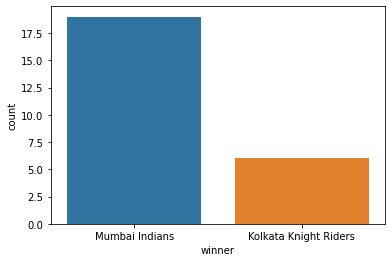

In [13]:
sb.countplot(main_df['winner'])

In [14]:
# Acc to the stats here , MI have won many matches than KKR

In [15]:
# Acc to latest stats for 26 match
# MI  - 20 win
# KKr - 6 win

In [16]:
## Since ,Sheik Zyada is the staidum to be played , and MI has good bowling line up and batsman , i guess MI will Win

# Ques 1 ans  - MI

In [18]:
########################################################################################################################

In [19]:
# Ques 2 - Wicktes lose in 6-15

In [47]:
main_df_team = df[(((df['batting_team'] == 'Mumbai Indians') | (df['batting_team'] == 'Kolkata Knight Riders')) & ((df['bowling_team'] == 'Mumbai Indians') | (df['bowling_team'] == 'Kolkata Knight Riders')))]

In [21]:
main_df_team

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1424,7,1,Kolkata Knight Riders,Mumbai Indians,1,1,G Gambhir,CA Lynn,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1425,7,1,Kolkata Knight Riders,Mumbai Indians,1,2,CA Lynn,G Gambhir,SL Malinga,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
1426,7,1,Kolkata Knight Riders,Mumbai Indians,1,3,CA Lynn,G Gambhir,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1427,7,1,Kolkata Knight Riders,Mumbai Indians,1,4,G Gambhir,CA Lynn,SL Malinga,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1428,7,1,Kolkata Knight Riders,Mumbai Indians,1,5,G Gambhir,CA Lynn,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178097,11347,2,Mumbai Indians,Kolkata Knight Riders,16,3,RG Sharma,AS Yadav,P Krishna,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178098,11347,2,Mumbai Indians,Kolkata Knight Riders,16,4,RG Sharma,AS Yadav,P Krishna,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
178099,11347,2,Mumbai Indians,Kolkata Knight Riders,16,5,RG Sharma,AS Yadav,P Krishna,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178100,11347,2,Mumbai Indians,Kolkata Knight Riders,16,6,AS Yadav,RG Sharma,P Krishna,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [31]:
wickets = main_df_team[ (((main_df_team['over'] >5)  & (main_df_team['over'] <16 ))  & (main_df_team['batting_team'] == 'Mumbai Indians'))]

In [32]:
wickets['over'].unique()

array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15], dtype=int64)

In [33]:
wickets

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1587,7,2,Mumbai Indians,Kolkata Knight Riders,6,1,PA Patel,JC Buttler,Kuldeep Yadav,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1588,7,2,Mumbai Indians,Kolkata Knight Riders,6,2,PA Patel,JC Buttler,Kuldeep Yadav,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
1589,7,2,Mumbai Indians,Kolkata Knight Riders,6,3,PA Patel,JC Buttler,Kuldeep Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1590,7,2,Mumbai Indians,Kolkata Knight Riders,6,4,JC Buttler,PA Patel,Kuldeep Yadav,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1591,7,2,Mumbai Indians,Kolkata Knight Riders,6,5,JC Buttler,PA Patel,Kuldeep Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178090,11347,2,Mumbai Indians,Kolkata Knight Riders,15,2,AS Yadav,RG Sharma,H Gurney,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
178091,11347,2,Mumbai Indians,Kolkata Knight Riders,15,3,AS Yadav,RG Sharma,H Gurney,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178092,11347,2,Mumbai Indians,Kolkata Knight Riders,15,4,RG Sharma,AS Yadav,H Gurney,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178093,11347,2,Mumbai Indians,Kolkata Knight Riders,15,5,AS Yadav,RG Sharma,H Gurney,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [41]:
fall = wickets['player_dismissed'].notna().sum()

In [39]:
match = wickets['match_id'].unique()

In [40]:
match

array([    7,    53,    58,    75,    99,   132,   138,   191,   230,
         303,   305,   363,   370,   413,   434,   458,   497,   518,
         567,   581,   600,  7930,  7934, 11338, 11347], dtype=int64)

In [42]:
fall / len(match)

2.16

In [43]:
## Acc to this stats - MI loses 2 wickets from over 6-15 wrt to KKr

In [45]:
## Lets check with all team

In [48]:
main_df_team_all = df[(((df['batting_team'] == 'Mumbai Indians') ))]

In [49]:
main_df_team_all

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
248,2,1,Mumbai Indians,Rising Pune Supergiant,1,1,PA Patel,JC Buttler,AB Dinda,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
249,2,1,Mumbai Indians,Rising Pune Supergiant,1,2,PA Patel,JC Buttler,AB Dinda,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
250,2,1,Mumbai Indians,Rising Pune Supergiant,1,3,PA Patel,JC Buttler,AB Dinda,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
251,2,1,Mumbai Indians,Rising Pune Supergiant,1,4,JC Buttler,PA Patel,AB Dinda,0,...,0,0,0,0,5,0,5,NaN,NaN,NaN
252,2,1,Mumbai Indians,Rising Pune Supergiant,1,5,PA Patel,JC Buttler,AB Dinda,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178949,11415,1,Mumbai Indians,Chennai Super Kings,20,2,KA Pollard,MJ McClenaghan,DJ Bravo,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178950,11415,1,Mumbai Indians,Chennai Super Kings,20,3,KA Pollard,MJ McClenaghan,DJ Bravo,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178951,11415,1,Mumbai Indians,Chennai Super Kings,20,4,KA Pollard,MJ McClenaghan,DJ Bravo,0,...,0,0,0,0,1,0,1,MJ McClenaghan,run out,F du Plessis
178952,11415,1,Mumbai Indians,Chennai Super Kings,20,5,KA Pollard,JJ Bumrah,DJ Bravo,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [50]:
print(main_df_team_all['player_dismissed'].notna().sum()  / main_df_team_all['match_id'].nunique())

5.973262032085562


In [51]:
## 6 wickets with respect to  all team acc to stats

In [52]:
(6 + 2) /2

4.0

In [53]:
## Acc to stats , the total loss of wickets will be in range of 3-4 wickets
## Hence opt 2

# Ques 2 ans - (3-4)

In [54]:
######################################################################################################################3

# Ques 3 - 4's by kkr

In [56]:
main_df_team.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [57]:
main_df_team_kkr = df[(((df['batting_team'] == 'Kolkata Knight Riders') & ((df['bowling_team'] == 'Mumbai Indians')) ))]

In [81]:
len(main_df_team_kkr)

2991

In [82]:
four = main_df_team_kkr[main_df_team_kkr['batsman_runs'] == 4]

In [86]:
four

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1430,7,1,Kolkata Knight Riders,Mumbai Indians,1,7,CA Lynn,G Gambhir,SL Malinga,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
1433,7,1,Kolkata Knight Riders,Mumbai Indians,2,2,CA Lynn,G Gambhir,MJ McClenaghan,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
1437,7,1,Kolkata Knight Riders,Mumbai Indians,2,6,G Gambhir,CA Lynn,MJ McClenaghan,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
1444,7,1,Kolkata Knight Riders,Mumbai Indians,3,7,G Gambhir,CA Lynn,JJ Bumrah,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
1445,7,1,Kolkata Knight Riders,Mumbai Indians,3,8,G Gambhir,CA Lynn,JJ Bumrah,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176024,11338,1,Kolkata Knight Riders,Mumbai Indians,19,5,AD Russell,KD Karthik,JJ Bumrah,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
176030,11338,1,Kolkata Knight Riders,Mumbai Indians,20,2,AD Russell,KD Karthik,SL Malinga,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
176031,11338,1,Kolkata Knight Riders,Mumbai Indians,20,3,AD Russell,KD Karthik,SL Malinga,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
177894,11347,1,Kolkata Knight Riders,Mumbai Indians,4,3,CA Lynn,S Gill,SL Malinga,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [87]:
count_four = len(four)

In [88]:
match = four['match_id'].nunique()

In [89]:
count_four / match

13.16

In [90]:
## 13 four wrt mumbai indians per match


In [91]:
## Lets check for all team

In [92]:
main_df_team_kkr_all = df[(((df['batting_team'] == 'Kolkata Knight Riders')))]

In [93]:
main_df_team_kkr_all

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
617,3,2,Kolkata Knight Riders,Gujarat Lions,1,1,G Gambhir,CA Lynn,P Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
618,3,2,Kolkata Knight Riders,Gujarat Lions,1,2,CA Lynn,G Gambhir,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
619,3,2,Kolkata Knight Riders,Gujarat Lions,1,3,CA Lynn,G Gambhir,P Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
620,3,2,Kolkata Knight Riders,Gujarat Lions,1,4,G Gambhir,CA Lynn,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
621,3,2,Kolkata Knight Riders,Gujarat Lions,1,5,G Gambhir,CA Lynn,P Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177997,11347,1,Kolkata Knight Riders,Mumbai Indians,20,2,RV Uthappa,R Singh,JJ Bumrah,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
177998,11347,1,Kolkata Knight Riders,Mumbai Indians,20,3,RV Uthappa,R Singh,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
177999,11347,1,Kolkata Knight Riders,Mumbai Indians,20,4,R Singh,RV Uthappa,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178000,11347,1,Kolkata Knight Riders,Mumbai Indians,20,5,RV Uthappa,R Singh,JJ Bumrah,0,...,0,0,0,0,0,0,0,RV Uthappa,caught,RG Sharma


In [94]:
four_all = main_df_team_kkr_all[main_df_team_kkr_all['batsman_runs'] == 4]

In [95]:
match_all = four_all['match_id'].nunique()

In [96]:
len(four_all) / match_all

13.674157303370787

In [97]:
# 13 fours again wrt to all team

In [98]:
#  but since this ground is different ! It depends on the bowler 
# hence ans is opt 3

# Ques 3 ans - (9-12) fours

In [99]:
###########################################################################################################################

# Ques 4 - Runs scored ?

In [117]:
main_df_team_kkr['total_runs'].sum()

3730

In [119]:
main_df_team_kkr['match_id'].nunique()

25

In [120]:
3730 / 25

149.2

In [122]:
## Avg of 150 runs for kkr per match wrt mumbai indians

In [123]:
main_df_team_mi = df[(((df['batting_team'] == 'Mumbai Indians') & ((df['bowling_team'] == 'Kolkata Knight Riders')) ))]

In [125]:
r = main_df_team_mi['total_runs'].sum()
m = main_df_team_mi['match_id'].nunique()
r / m

158.2

In [126]:
## Avg of 160 runs for mi wrt to kkr per match

In [127]:
## therefore total runs goes 30 -310 when both mi and kkr play face to face

In [128]:
## Lets check kkr wrt to all team

In [129]:
main_df_team_kkr_all = df[(((df['batting_team'] == 'Kolkata Knight Riders')))]
r = main_df_team_kkr_all['total_runs'].sum()
m = main_df_team_kkr_all['match_id'].nunique()
r / m

154.03932584269663

In [131]:
## 154 runs avg wrt to all team in ipl

In [132]:
## Lets check mi wrt to all team

In [133]:
main_df_team_mi_all = df[(((df['batting_team'] == 'Mumbai Indians')))]
r = main_df_team_mi_all['total_runs'].sum()
m = main_df_team_mi_all['match_id'].nunique()
r / m

159.40641711229947

In [134]:
## 160 avg runs wrt all team 

In [135]:
## total runs are around 315 - 320

In [136]:
## therefore ans is 321-340

# Ques 4 ans  - (321 - 340)

In [137]:
###########################################################################################################################3

# Ques 5 - How will Rohit Sharma get out ?

In [141]:
main_df_team_mi_rohit = main_df_team_mi[main_df_team_mi['batsman'] == 'RG Sharma']

In [145]:
main_df_team_mi_rohit['dismissal_kind'].unique()

array([nan, 'lbw', 'caught', 'caught and bowled', 'bowled'], dtype=object)

In [148]:
main_df_team_mi_rohit['dismissal_kind'].value_counts()

caught               7
lbw                  3
bowled               2
caught and bowled    1
Name: dismissal_kind, dtype: int64

In [149]:
## wrt to kkr -- Rohit gets out by catch

In [150]:
main_df_team_mi_all_rohit = main_df_team_mi_all[main_df_team_mi_all['batsman'] == 'RG Sharma']

In [151]:
main_df_team_mi_all_rohit['dismissal_kind'].unique()

array([nan, 'bowled', 'lbw', 'caught', 'caught and bowled', 'stumped',
       'run out'], dtype=object)

In [152]:
main_df_team_mi_all_rohit['dismissal_kind'].value_counts()

caught               75
bowled               17
run out              11
lbw                  10
caught and bowled     5
stumped               2
Name: dismissal_kind, dtype: int64

In [153]:
## Wrt to all teams , he has been caught 75 times

# Ques 5 ans  - Catch out